<a href="https://colab.research.google.com/github/NjoodJ/Training/blob/main/11_Sentiment_analysis_for_Arabic_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
# Reading the file of Internet Movie Database (IMDB)
df = pd.read_csv('/content/Book1.csv', sep = ',')
df.head(10)

,Label,Text
0,pos,ﾟ ♬ . لا تناقشني في شخص أنت تشوفه بعينك وأنا أ...
1,pos,_ ♨️ عسل سدر 🎀 ♨️ اقسم بالله انه عسل سدر ♨️ ⛰ ...
2,neg,_ 🔴 عسل المجرى للمتزوجين 🔴 ✔ أفضل المقويات الج...
3,neg,_⛔ #مناحل_ابو_سلطان . . 🍯 اقسم بالله انه عسل 🍯...
4,neg,_⛔ #مناحل_ابو_سلطان . . 🍯 اقسم بالله انه عسل 🍯...
5,neg,- أمطري ياسماء و إسقي قلوب الحاقدين 🥀
6,pos,- ربي رجوتك صباحا تسعد به من أحب . ❤
7,pos,- لا خاالص 😂 - لا ولا برضه 😂
8,pos,- لماذا تعلقت بي هكذا ؟ - لأننا في القرن الواح...
9,pos,- وإن ضاقت عليک يوما ف أنا أمک وأختک وحبيبتک و...


In [105]:
Texts = df
sentiment_clean = Text.Label.factorize()	
sentiment_clean

(array([0, 0, 1, ..., 1, 0, 0]), Index(['pos', 'neg'], dtype='object'))

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
Rev = Texts.Text.values
tokenizer = Tokenizer(num_words = 5000)
df = df.dropna()
tokenizer.fit_on_texts(Rev)
size = len(tokenizer.word_index) + 1
encoded = tokenizer.texts_to_sequences(Rev)
paded_sequences = pad_sequences(encoded, maxlen = 200)
#print(tokenizer.word_index)
print(paded_sequences)

[[   0    0    0 ...  606  346  281]
 [   0    0    0 ... 1840   81 1841]
 [   0    0    0 ... 1847 1848 1849]
 ...
 [   0    0    0 ... 1311    5   54]
 [   0    0    0 ...  168   17   14]
 [   0    0    0 ... 1659   41  219]]


In [67]:
print(Rev[0])
print(encoded[0])

ﾟ ♬ . لا تناقشني في شخص أنت تشوفه بعينك وأنا أشوفه بقلبي . ♥ . 🥀
[1830, 1831, 9, 1832, 2, 90, 151, 1833, 1834, 204, 1835, 606, 346, 281]


In [68]:
print(paded_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 1830 1831    9 1832    2   90  151 1833 1834  204
 1835 

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
 
embedding_vector_length = 32
Model = Sequential() 
Model.add(Embedding(size, embedding_vector_length, input_length=200) )
Model.add(SpatialDropout1D(0.25))
Model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
Model.add(Dropout(0.2))
Model.add(Dense(1, activation='sigmoid')) 
Model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           213088    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 229,739
Trainable params: 229,739
Non-trainable params: 0
__________________________________________________

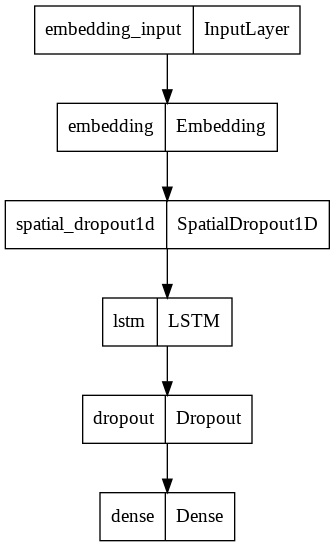

In [70]:
from tensorflow.keras.utils import plot_model
plot_model (Model , to_file='model.png')

In [71]:
history = Model.fit(paded_sequences,sentiment_clean[0],validation_split=0.2, epochs=20, batch_size=16)

Epoch 1/20
54/54 [==============================] - 15s 215ms/step - loss: 0.6900 - accuracy: 0.5500 - val_loss: 0.6838 - val_accuracy: 0.6065
Epoch 2/20
54/54 [==============================] - 11s 213ms/step - loss: 0.6455 - accuracy: 0.6942 - val_loss: 0.6312 - val_accuracy: 0.7778
Epoch 3/20
54/54 [==============================] - 11s 201ms/step - loss: 0.5324 - accuracy: 0.8419 - val_loss: 0.5706 - val_accuracy: 0.6667
Epoch 4/20
54/54 [==============================] - 11s 206ms/step - loss: 0.3289 - accuracy: 0.9058 - val_loss: 0.5562 - val_accuracy: 0.7083
Epoch 5/20
54/54 [==============================] - 12s 218ms/step - loss: 0.2268 - accuracy: 0.9384 - val_loss: 0.5216 - val_accuracy: 0.7269
Epoch 6/20
54/54 [==============================] - 11s 208ms/step - loss: 0.1578 - accuracy: 0.9523 - val_loss: 0.4905 - val_accuracy: 0.7546
Epoch 7/20
54/54 [==============================] - 11s 205ms/step - loss: 0.1094 - accuracy: 0.9767 - val_loss: 0.4698 - val_accuracy: 0.7778

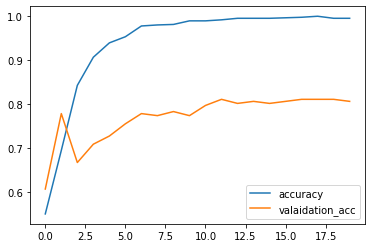

In [72]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='valaidation_acc')
plt.legend()
plt.show()

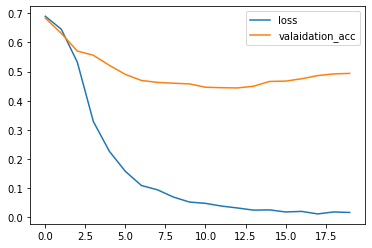

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='valaidation_acc')
plt.legend()
plt.show()

In [100]:
Test ="	♥️🎁 مسابقة 🎁♥️ _ الشروط فقط 👌_ ( متابعة + ريتويت ) 🎁وتدخل السحب 🎁 🌹 بالتوفيق للجميع 🌹 ⏰السحب بعد يومين ⏰"
tw = tokenizer.texts_to_sequences([Test])
tw

[[522, 272, 216, 832, 577, 1636, 47, 600, 31, 4394, 1100, 31, 25, 231]]

In [101]:
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [102]:
prediction = int(Model.predict(tw).round().item())

In [103]:
sentiment_clean[1][prediction]


'pos'